In [1]:
import pandas as pd
import csv
import os

# This just checks and lists the file you want to use, could be used to make the code iterate through multiple files if desired


In [2]:
dat_files = []
# Iterate directory
for file in os.listdir():
    # check only text files
    if file.endswith('.dat'):
        dat_files.append(file)
print(dat_files)

['WeatherStation_Table1_040722.dat']


# Converts the data to a csv, sets the index as the timestamp


In [165]:
data = pd.read_csv('WeatherStation_Table1_040722.dat', sep=',', header=1, skipinitialspace=True)
data.to_csv('WeatherStation_Table1_040722.csv', encoding='utf-8', index=True)

data = data.set_index(data['TIMESTAMP'])
data.drop('TIMESTAMP', inplace=True, axis=1)



,RECORD,BattV_Avg,PTemp_C_Avg,AirTC_Avg,RH,SlrW_Avg,SlrMJ_Tot,WS_ms_S_WVT,WindDir_D1_WVT,Rain_mm_Tot,BP_mbar_Avg
TIMESTAMP,,,,,,,,,,,
TS,RN,Volts,Deg C,Deg C,%,W/m^2,MJ/m^2,meters/second,Deg,mm,mbar
NaN,NaN,Avg,Avg,Avg,Smp,Avg,Tot,WVc,WVc,Tot,Avg
2022-04-29 07:50:00,0,12.77,23.2,NAN,32.71,NAN,NAN,0,0,0,1019.86
2022-04-29 08:00:00,1,12.75,23.14,22.55,32.85,10.95,0.006569467,0,0,0,1026.371
2022-04-29 08:10:00,2,12.75,23.13,22.51,32.78,62.94,0.03776119,0.295,239.4,0.4,1026.384
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-04 12:20:00,5630,13.87,18.49,17.22,58.46,656.5,0.3939169,2.705,250.7,0,1013.189
2022-07-04 12:30:00,5631,13.85,18.83,17.45,55.66,1019,0.6113355,3.51,250.7,0,1013.134
2022-07-04 12:40:00,5632,13.85,19.23,17.93,55.31,895,0.5367243,2.834,245.6,0,1012.991


# Iterates through each column (after 'RECORD'), plots the data against the index
## Data_f is the raw data in float points

Most recent observations at - 2022-07-04 13:00:00
BattV_Avg - 13.82 (Volts)
PTemp_C_Avg - 20.13 (Deg C)
AirTC_Avg - 18.07 (Deg C)
RH - 52.35 (%)
SlrW_Avg - 595.8 (W/m^2)
SlrMJ_Tot - 0.3574816 (MJ/m^2)
WS_ms_S_WVT - 3.668 (meters/second)
WindDir_D1_WVT - 247.8 (Deg)
Rain_mm_Tot - 0.0 (mm)
BP_mbar_Avg - 1012.912 (mbar)


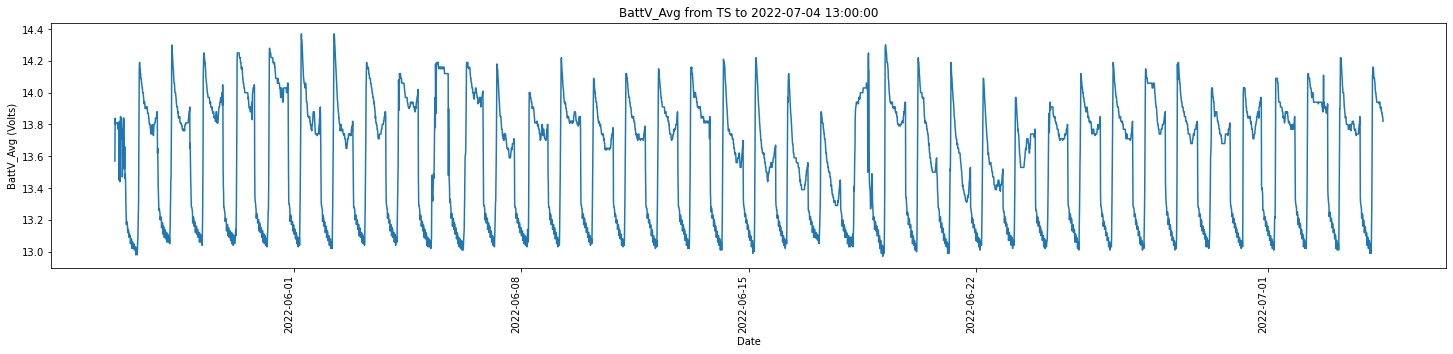

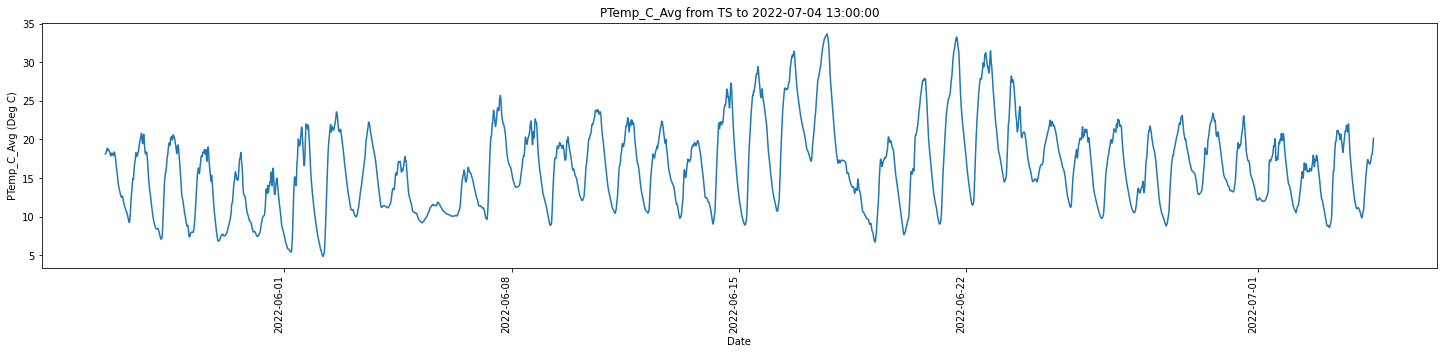

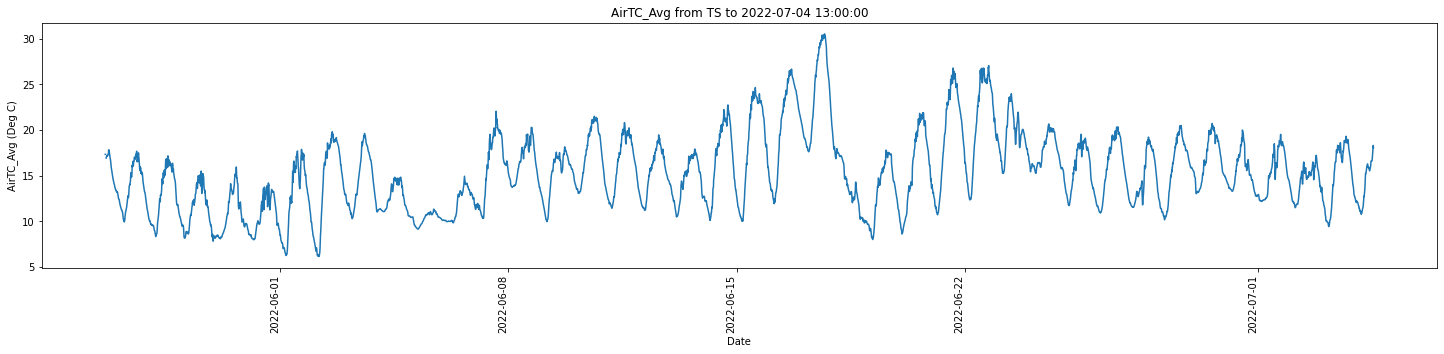

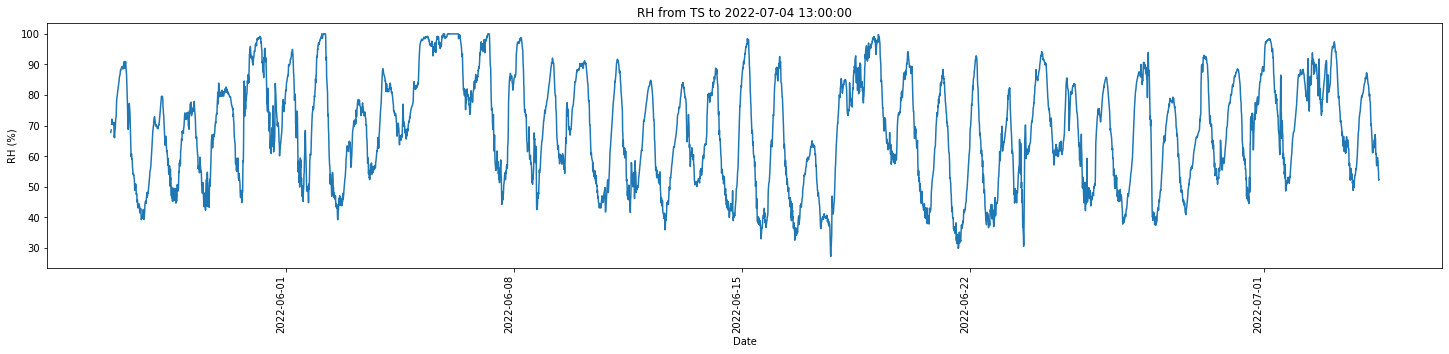

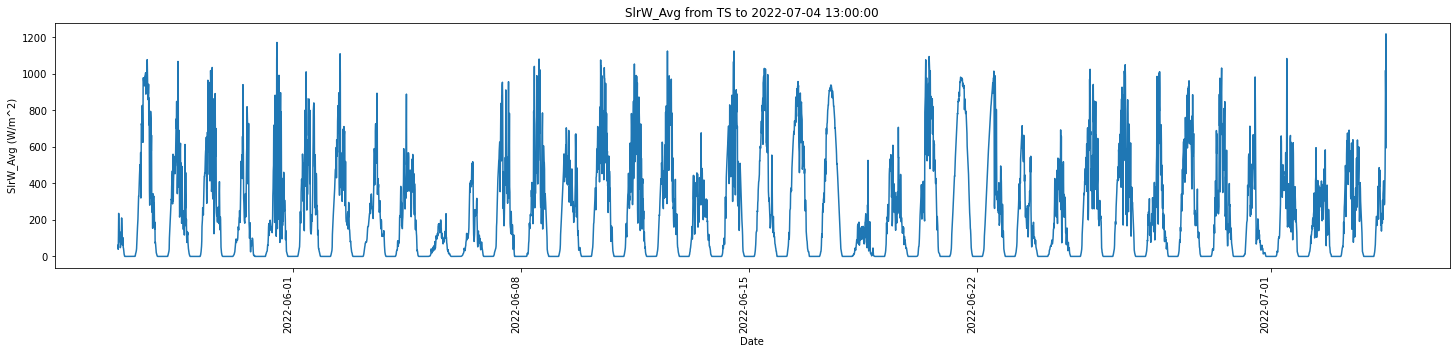

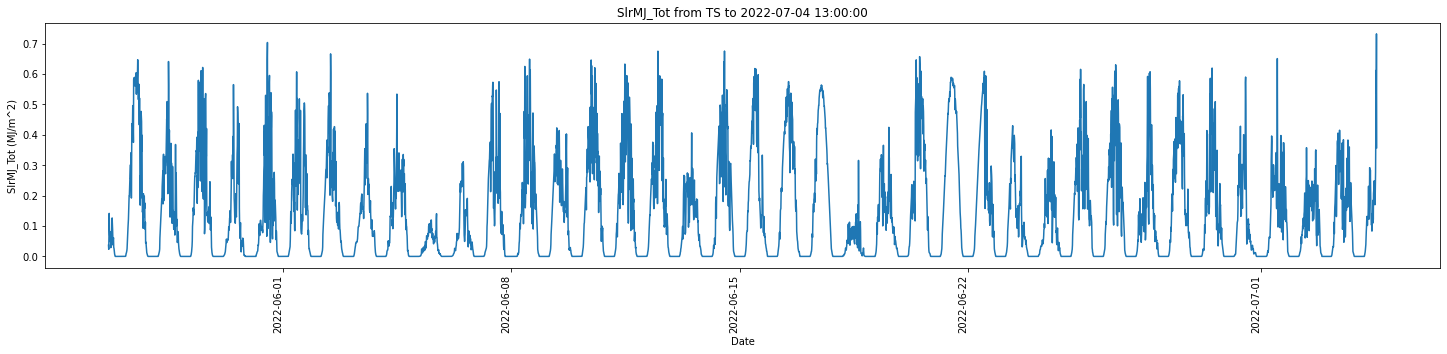

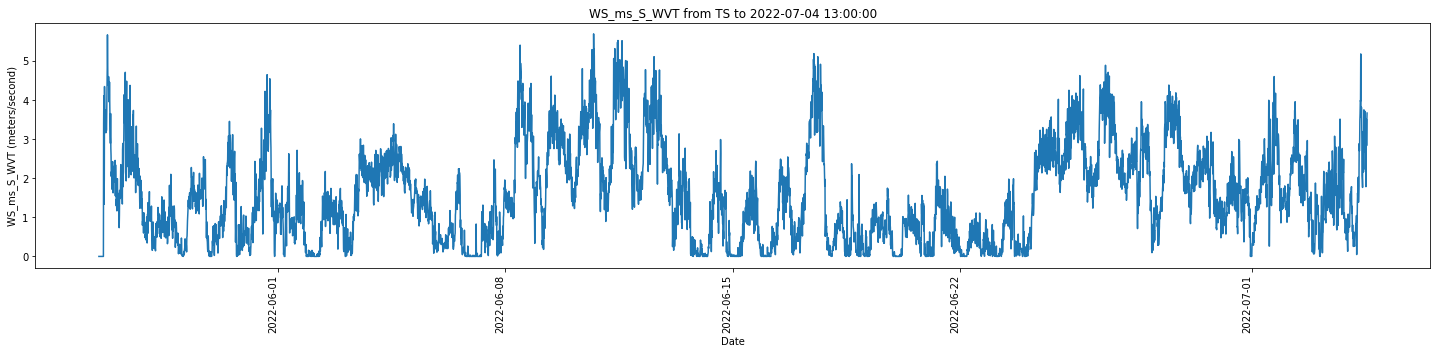

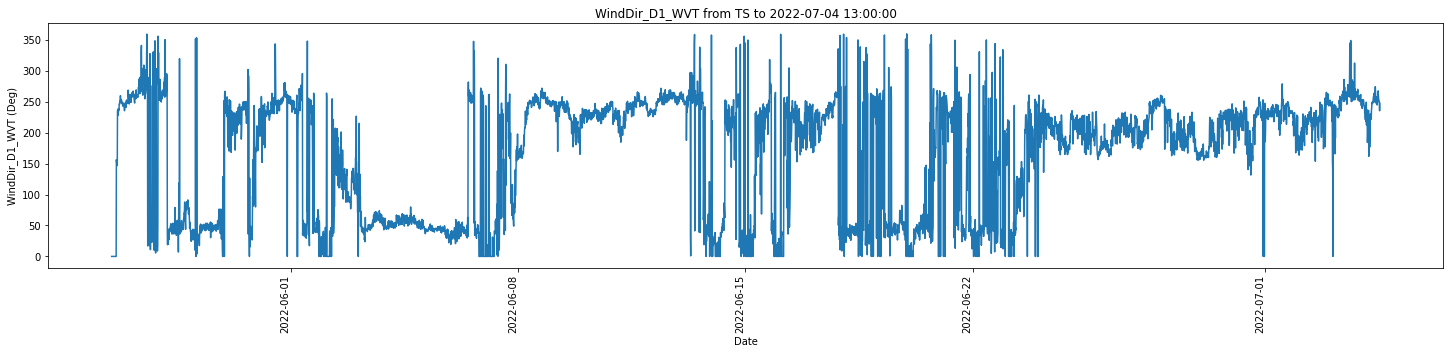

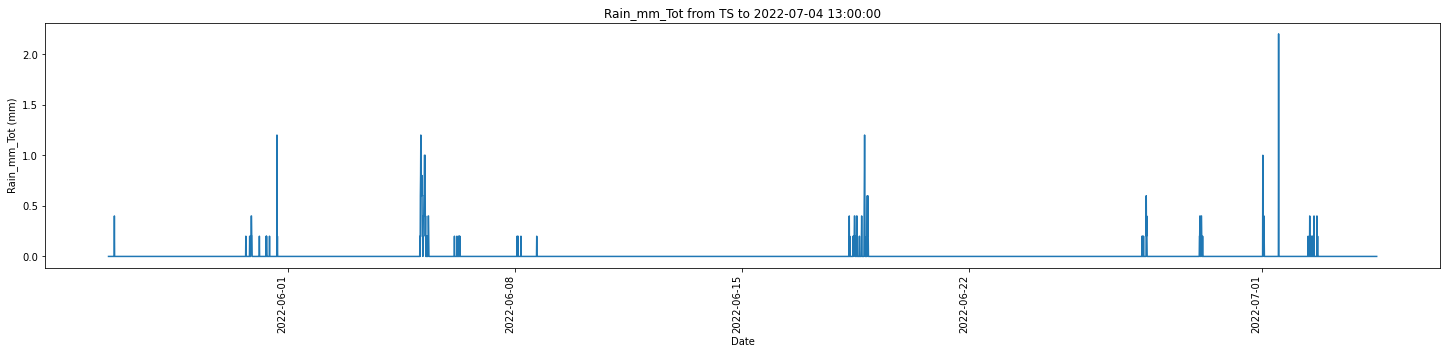

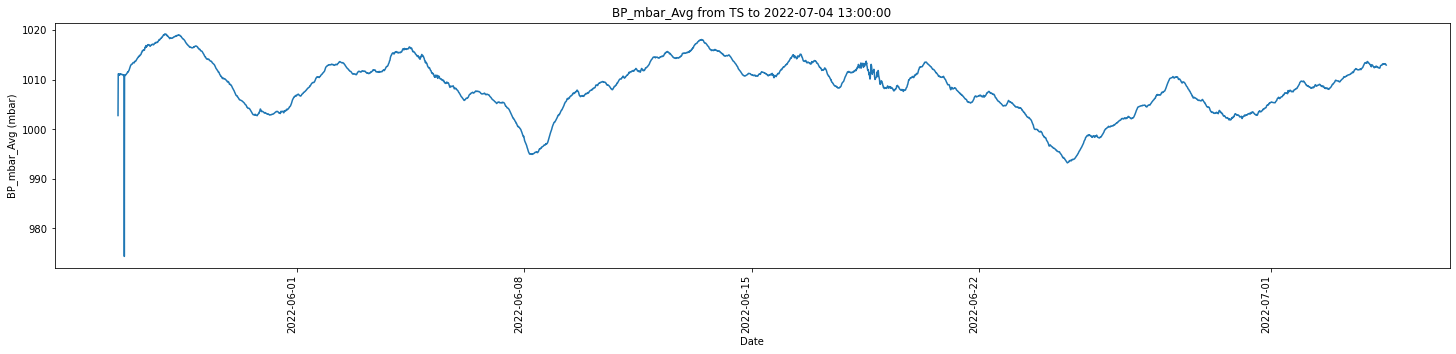

In [171]:
data_f = data[2:]
data_f.index = pd.to_datetime(data_f.index)
for i in data[1:].keys():
    data_f = data_f.astype(float)
    

#Start date is set as 26/05/2022 11:40:00 which is when main data collection
start = pd.to_datetime("26-05-2022 11:40:00")
start_index = data_f.index.get_loc(start, method='nearest')

data_f = data_f[start_index:]
start_date, end_date = data.index[0], data.index[-1]

print('Most recent observations at - ' + str(end_date))

for i in data.keys()[1:]:
    data_f.plot(y = i, x_compat = True, rot = 90, figsize = (25, 5),
    legend = False, xlabel = "Date", ylabel = str(i) + ' (' + str(data[i][0]) + ')',
    title = str(i) + ' from ' + str(start_date) + ' to ' + str(end_date))
    print(str(i) + ' - ' + str(data_f[i][-1]) + ' (' + str(data[i][0]) + ')')

In [172]:
data

,RECORD,BattV_Avg,PTemp_C_Avg,AirTC_Avg,RH,SlrW_Avg,SlrMJ_Tot,WS_ms_S_WVT,WindDir_D1_WVT,Rain_mm_Tot,BP_mbar_Avg
TIMESTAMP,,,,,,,,,,,
TS,RN,Volts,Deg C,Deg C,%,W/m^2,MJ/m^2,meters/second,Deg,mm,mbar
NaN,NaN,Avg,Avg,Avg,Smp,Avg,Tot,WVc,WVc,Tot,Avg
2022-04-29 07:50:00,0,12.77,23.2,NAN,32.71,NAN,NAN,0,0,0,1019.86
2022-04-29 08:00:00,1,12.75,23.14,22.55,32.85,10.95,0.006569467,0,0,0,1026.371
2022-04-29 08:10:00,2,12.75,23.13,22.51,32.78,62.94,0.03776119,0.295,239.4,0.4,1026.384
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-04 12:20:00,5630,13.87,18.49,17.22,58.46,656.5,0.3939169,2.705,250.7,0,1013.189
2022-07-04 12:30:00,5631,13.85,18.83,17.45,55.66,1019,0.6113355,3.51,250.7,0,1013.134
2022-07-04 12:40:00,5632,13.85,19.23,17.93,55.31,895,0.5367243,2.834,245.6,0,1012.991


# Plot the last 7 days

BattV_Avg - 13.82 (Volts)
PTemp_C_Avg - 20.13 (Deg C)
AirTC_Avg - 18.07 (Deg C)
RH - 52.35 (%)
SlrW_Avg - 595.8 (W/m^2)
SlrMJ_Tot - 0.3574816 (MJ/m^2)
WS_ms_S_WVT - 3.668 (meters/second)
WindDir_D1_WVT - 247.8 (Deg)
Rain_mm_Tot - 0.0 (mm)
BP_mbar_Avg - 1012.912 (mbar)


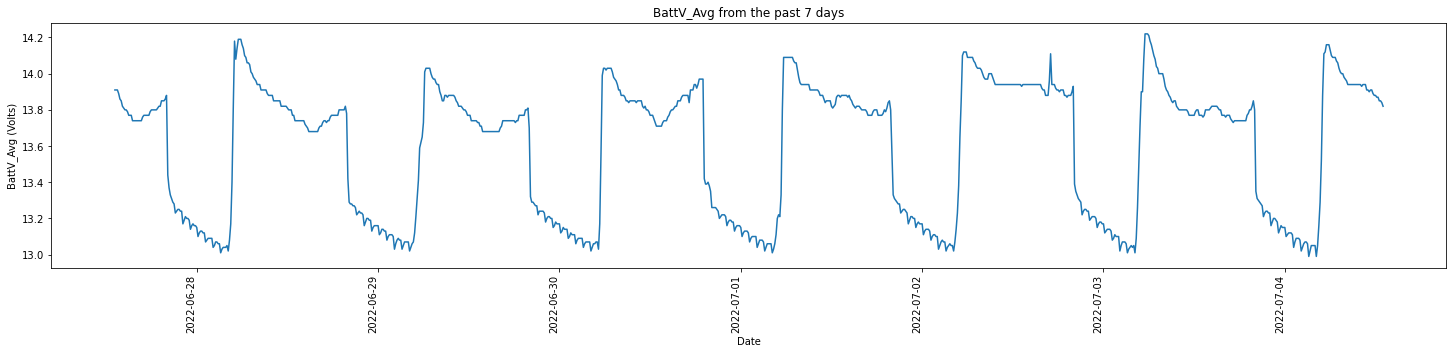

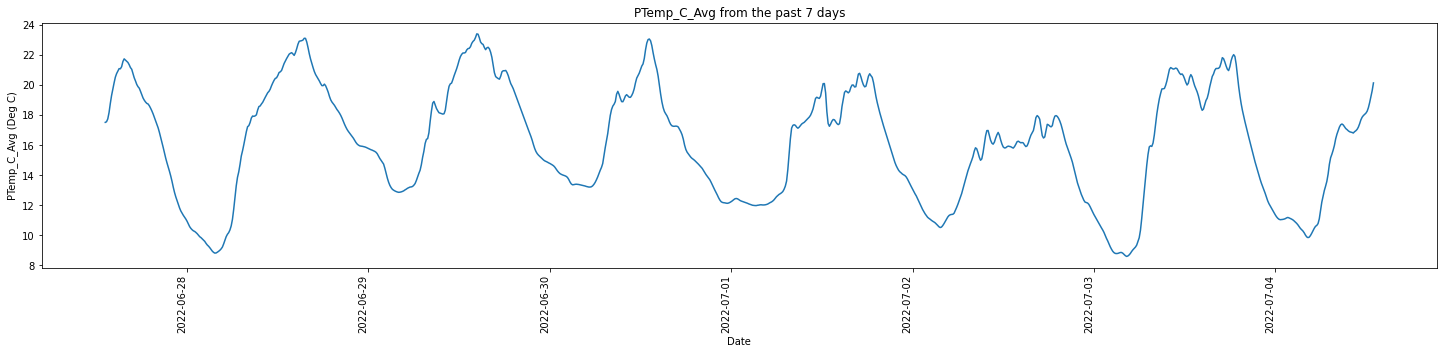

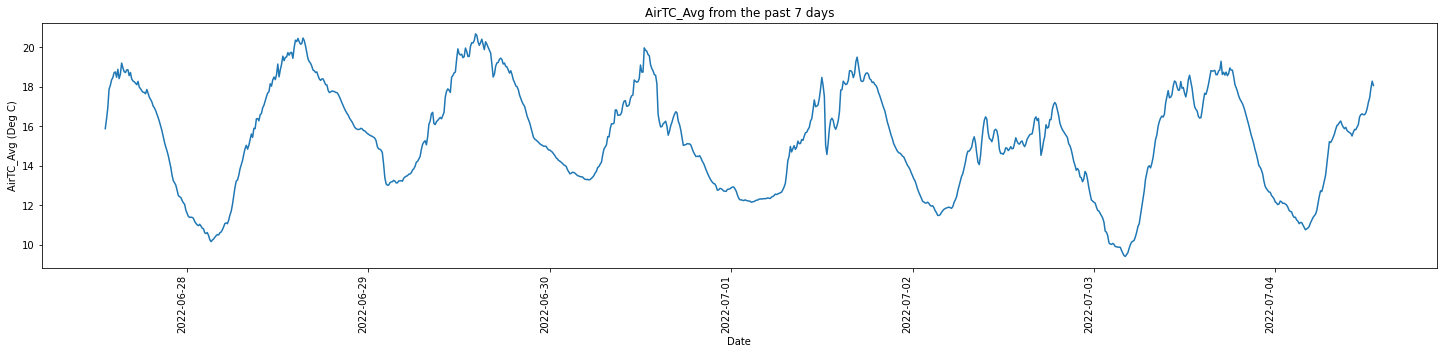

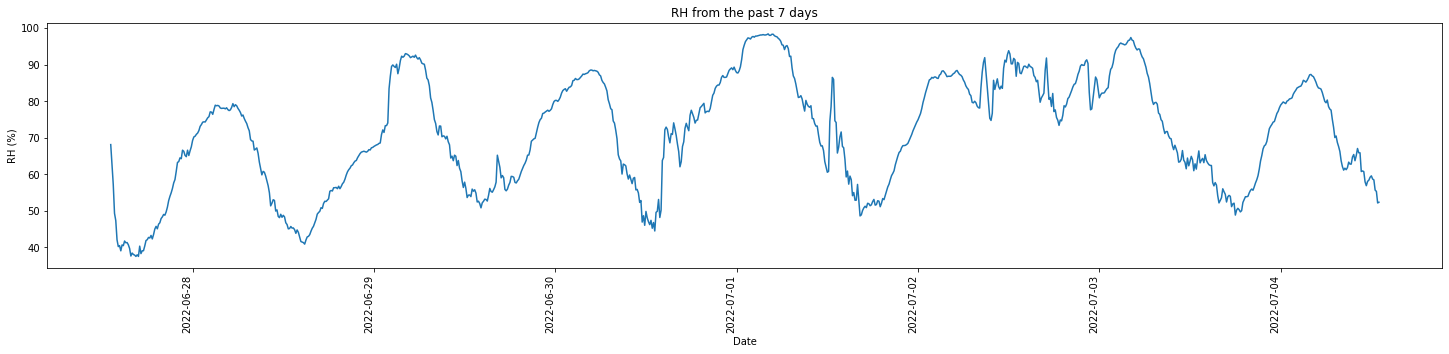

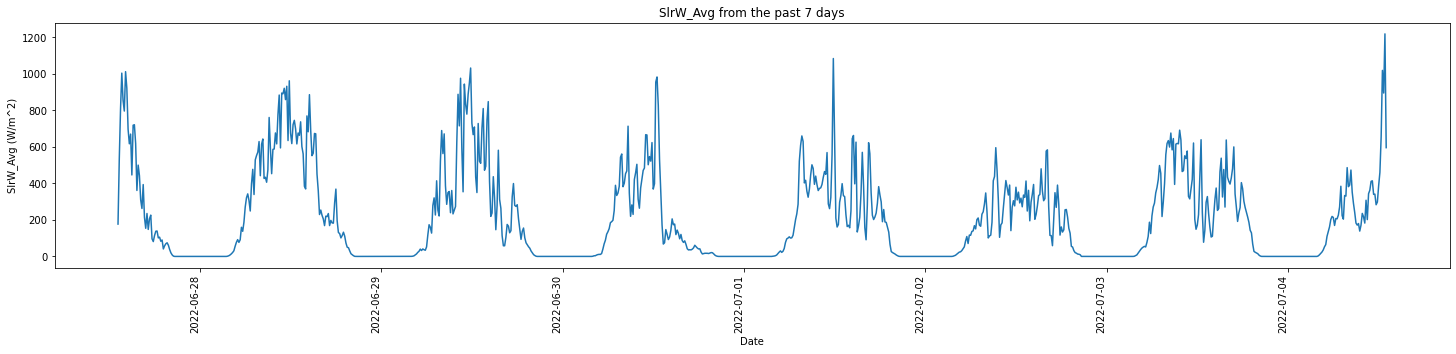

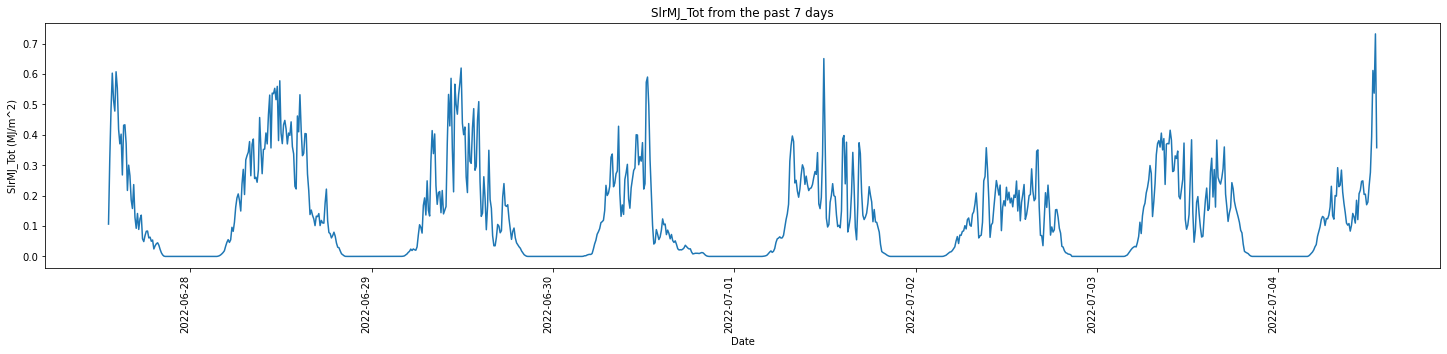

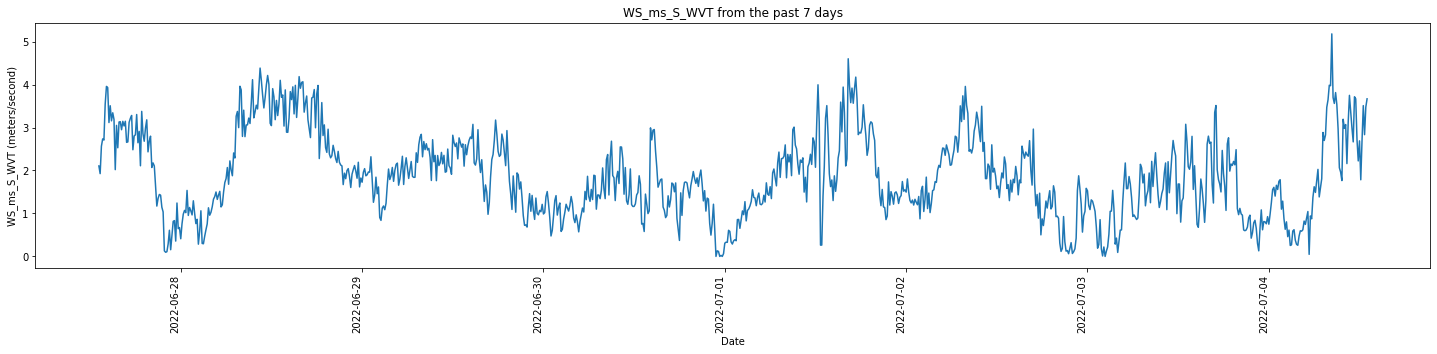

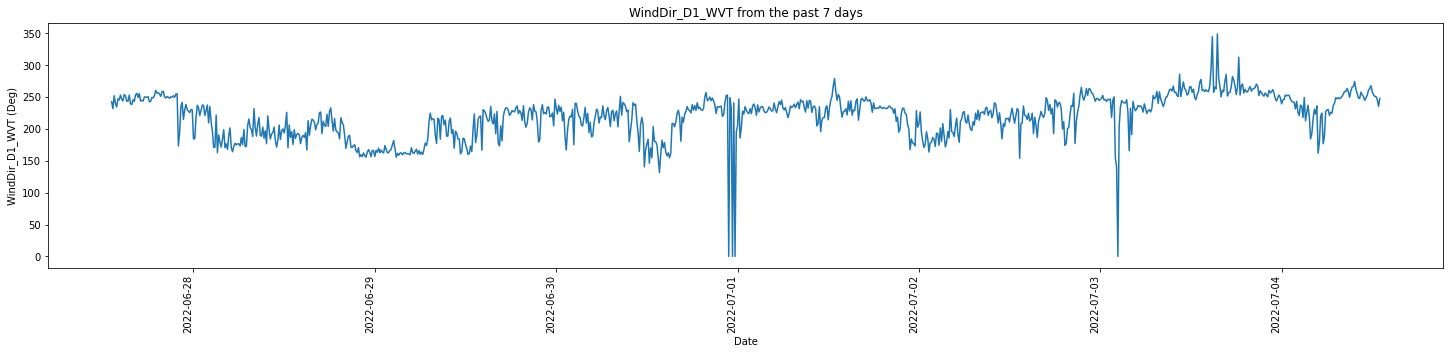

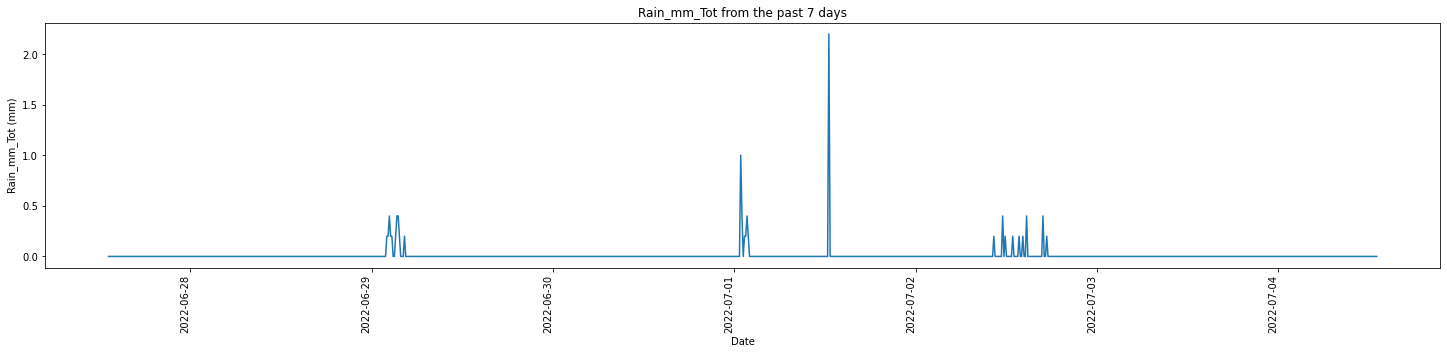

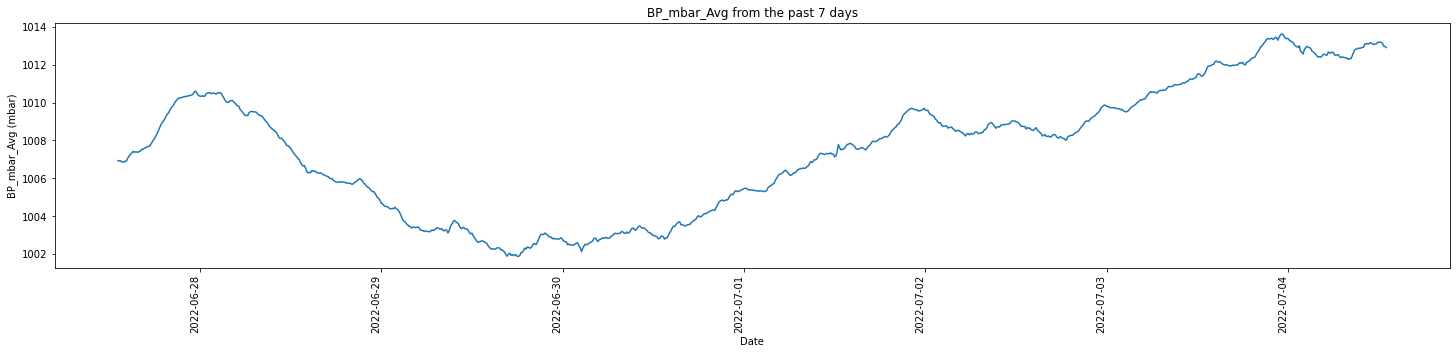

In [173]:
n = 7 * 24 * 6
for i in data_f.keys()[1:]:
    data_f[-n:].plot(y = i, x_compat = True, rot = 90, figsize = (25, 5),
    legend = False, xlabel = "Date", ylabel = i + ' (' + data[i][0] + ')',
    title = str(i) + ' from the past 7 days' )
    print(str(i) + ' - ' + str(data_f[i][-1]) + ' (' + str(data[i][0]) + ')')

# Windrose visualisation testing

In [175]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as n


In [179]:
ws = data_f['WS_ms_S_WVT']
wd = data_f['WindDir_D1_WVT']

5.693


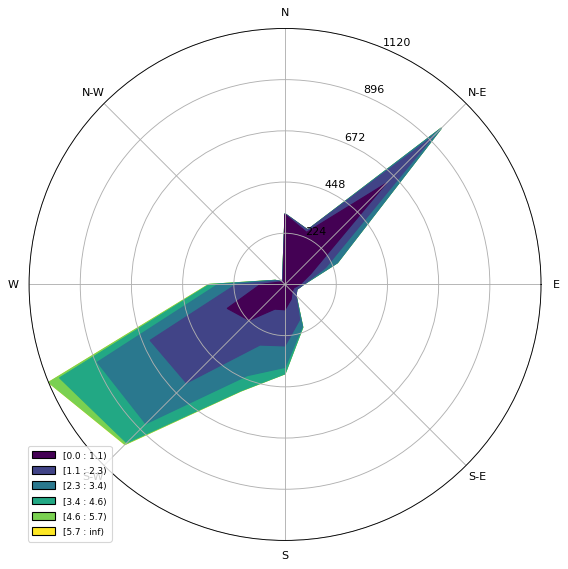

In [195]:
ax = WindroseAxes.from_ax()
#ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
levels = []
ax.contourf(wd, ws, cmap=cm.viridis, bins = bins)
print(max(ws))
ax.set_legend()

